# Wind Turbine Power Production
___

###  Project assessment
#### [Fundamentals of Data Analysis Module GMIT 2020 ]

<img align="left" width="350" src="https://assets.stickpng.com/images/59aeb26c32bcd87615d27977.png">
<br>

<br>

Lecturer: _[Ian McLoughlin](https://github.com/ianmcloughlin)_

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents

* [Overview](#overview)
* [General Setup](#setup)
* [Reading the Data and Performing Basic Data Checks](#loading_data)
* [Data Preprocessing](#preproccesing)
    * [Removing Outliers](#outliers)
    * [Creating Arrays for the Speed and the Power Variables](#arrays)
    * [Scaling](#scale)
    * [Creating the Training and Test Data sets](#split)
* [Build, Predict, and Evaluate the Models](#models)
    * [](#)
    * [](#)
    * [](#)

<br>

### Overview. <a name="overview"></a>
___

Wind turbine power output is known for having a strong correlation with wind speed. In this work, three models were built for predicting the turbine response for a given wind speed: Simple Linear Regression [1],  [2], and  [3]. The notebook also includes an analysis of a data set **powerproduction** and its preprocessing. 

The performance evaluation of the models was conducted using two metrics - [R-squared regression score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [Root Mean Squared Error (RMSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). The indicators of a good model are low RMSE and high R-squared regression score. [4]

> [1] [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
<br>
[2] []()
<br>
[3] []()
<br>
[4] []()

<br>

### General Setup. <a name="setup"></a>
___

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

from scipy import stats
# Plotting.
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Style for plots.
plt.style.use('ggplot')
plt.rcParams["figure.titlesize"] = 18

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Reading the Data and Performing Basic Data Checks. <a name="loading_data"></a>
___


In [3]:
# Load the data set.
df = pd.read_csv("powerproduction.txt")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has 500 rows and 2 columns with two numerical variables, **speed** and **power**, which are represented by real numbers. There are no empty values in the data set.

In [4]:
# Generate descriptive statistics.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The mean speed is 12.59, while the mean power stands at 48.01. Moreover, there is a difference in the scale of the variables: speed has a range between 0.00 to 25.00 and power - between 0.00 and 113.556. This difference will be addressed in the preprocessing.

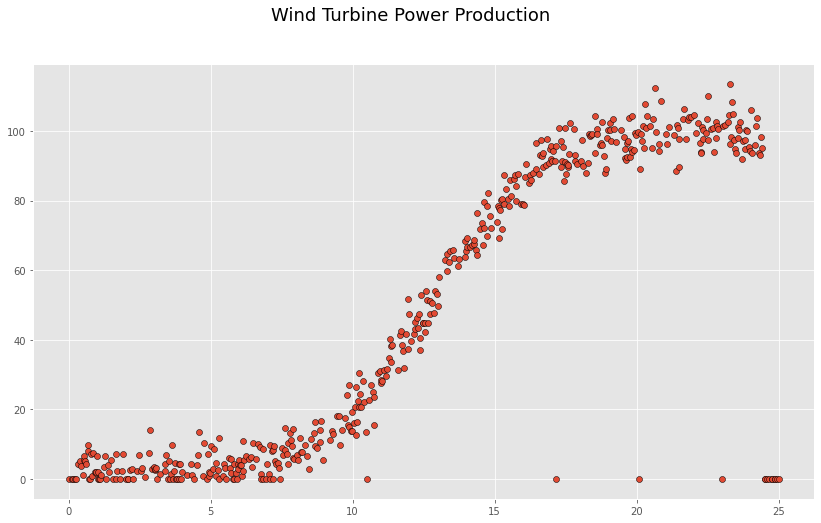

In [5]:
# Create a figure. axis and title.
fig,ax = plt.subplots()
fig.suptitle("Wind Turbine Power Production")

# Plot the data.
ax.scatter(df.speed, df.power,edgecolor="black")

# Show the plot.
plt.show()

The above plot shows that the data follows a polynomial regression. The relationship between Power and Speed predominantly takes an "S"-shape. The power rises dramatically with speed over about 8 m/s and slows when the speed reaches about 17 m/s.

Additionally, we can see some outliers where the speed is between 5 m/s and 24 m/s. However, the power is still 0. The 0 power points for around 25 m/s wind speed might be suggestting the shutdown of the wind turbine for damage mitigation, thus I will not consider them as outliners.

<br>

###  Data Preprocessing. <a name="preproccesing"></a>
___

Prior to building models the data should undergo data preprocessing. 

There are 4 steps:
* Removing Outliers
* Creating arrays for the speed and the power.
* Scaling to account for the difference in scale of the variables.
* Creating the training and test data sets.

#### 1. Removing Outliers.  <a name="outliers"></a>
The first step is to remove the outliers from our data set. [5]

> [5] [Delete rows based on multiple conditions; including other column conditionals](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)

In [6]:
# Remove Outliers.
df_new = df.drop(df[(df.power == 0) & (df.speed > 5) &  (df.speed < 24)].index)

# Display the cleaned data set.
df_new

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


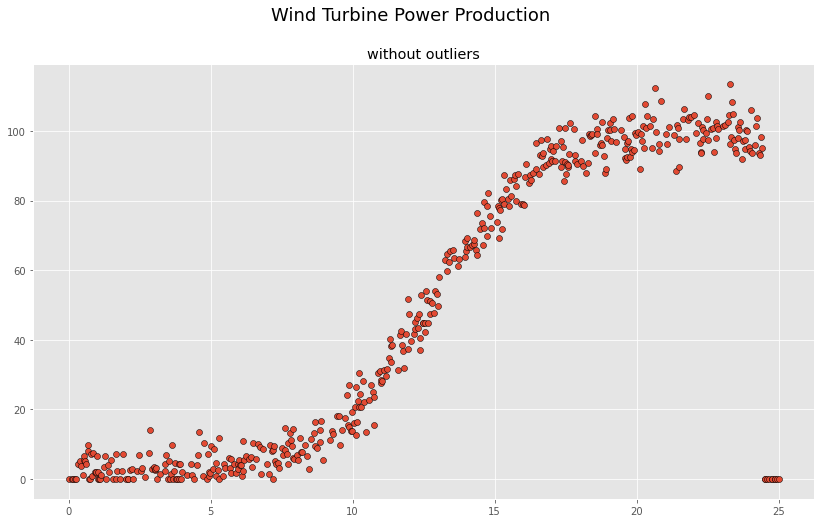

In [7]:
# Create a figure. axis and title.
fig,ax = plt.subplots()
fig.suptitle("Wind Turbine Power Production")
ax.set_title("without outliers")

# Plot the data.
ax.scatter(df_new.speed, df_new.power,edgecolor="black")

# Show the plot.
plt.show()

<br>

#### 2. Creating Arrays for the Speed and the Power Variables.  <a name="arrays"></a>

Now the data set should be separated for speed and power values. I will also preprocess a few speed samples for 0 m/s, 30 m/s, 70 m/s as it is known from the data set that the power output should be 0. 

In [8]:
# Separate speed and power.
speed = df_new.iloc[:, 0].values
power = df_new.iloc[:, 1].values

# Convert them into a numpy array and reshape.
X = np.array(speed)
y = np.array(power)

# Test for 0, 30 and 70 m/s speed
s_0 = np.array(0)
s_30 = np.array(30)
s_70 = np.array(70)

<br>

#### 3. Scaling. <a name="scale"></a>
Next we can scale the variables. By comparing different scalers I reached the conclusion that the best results are achieved with MinMaxScaler. [6]

> [6] [Normalization Techniques in Python Using NumPy](https://towardsdatascience.com/normalization-techniques-in-python-using-numpy-b998aa81d754)

In [9]:
# Create a instance of a scaler.
X_scaled = (X- np.min(X)) / (np.ptp(X))
y_scaled = (y - np.min(y)) / (np.ptp(y))

# Rescaled data set.
df_rescaled = pd.DataFrame({"speed":X_scaled, "power":y_scaled})
df_rescaled

,speed,power
0,0.000,0.0
1,0.005,0.0
2,0.006,0.0
3,0.009,0.0
4,0.011,0.0
...,...,...
482,0.991,0.0
483,0.994,0.0
484,0.995,0.0
485,0.998,0.0


<br>

#### 4. Creating the Training and Test Data sets.  <a name="split"></a>
We will build our model on the training set and evaluate its performance on the test set.

> [7] [Train test split without using scikit learn](https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn/47202397)
<br>
[8] [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

In [10]:
# Shuffle the data set 
shuffle_df = df_rescaled.sample(frac=1, random_state=1)

# Define a size for your train set 
train_size = int(0.7 * len(df_rescaled))

# Split the data on training and test
speed_train, speed_test = shuffle_df.speed[:train_size].values, shuffle_df.speed[train_size:].values
power_train, power_test = shuffle_df.power[:train_size].values, shuffle_df.speed[train_size:].values

# Print the shape of the new sets.
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")

Training set: (340,), (340,)
Test set: (147,), (147,)


<br>

### Build, Predict, and Evaluate the Models. <a name="models"></a>

<br>

#### Simple Linear Regression.  <a name="lr"></a>
___

This model demonstrates how to approximate a function with a polynomial features by using Linear regression. 

<br>

_Model Building._

<br>
[8] [How to sort with lambda in Python](https://stackoverflow.com/questions/3766633/how-to-sort-with-lambda-in-python)


In [11]:
model = np.polyfit(speed_train, power_train, 17)
predict = np.poly1d(model)
predict

poly1d([ 1.78071521e+08, -1.47202608e+09,  5.54654863e+09, -1.26142078e+10,
        1.93265038e+10, -2.10852722e+10,  1.68835255e+10, -1.00789930e+10,
        4.51152090e+09, -1.51066115e+09,  3.74651574e+08, -6.75691293e+07,
        8.61025503e+06, -7.42104170e+05,  4.04367243e+04, -1.24476711e+03,
        1.73491301e+01, -2.98513614e-02])

<br>

_Prediction_

Now that we have the model created, we can make predictions on the training and test data and plot them along with the actual data.

In [12]:
# Predict power from train and test speed.
y_train_pred = predict(speed_train)
y_test_pred = predict(speed_test)

To view the results the rescaled power needs to be transformed back. [10] [11] For comparison of the actual and predicted power I randomly chose the 3rd row from training power and the 5th from test power. Additionally, I will check if the predicted power is 0 for 0 m/s and 30 m/s (as suggested in our data set. 

> [10] [scikit-learn: how to scale back the 'y' predicted result](https://stackoverflow.com/questions/38058774/scikit-learn-how-to-scale-back-the-y-predicted-result)
<br>
[11] [GeeksForGeeks: Remove square brackets from list](https://www.geeksforgeeks.org/python-remove-square-brackets-from-list/)

In [17]:
# Unscaling of power.
power_train_unscaled = (power_train * np.ptp(y) + np.min(y))[20]
power_test_unscaled = (power_test * np.ptp(y) + np.min(y))[32]

y_train_unscaled = (y_train_pred * np.ptp(y) + np.min(y))[20]
y_test_unscaled = (y_test_pred * np.ptp(y) + np.min(y))[32]

# Printing actual and predicted training power.
print(f"TRAINING DATA\nActual power:\t {power_train_unscaled}")
print(f"Predicted power: {y_train_unscaled}")

# Printing actual and predicted test power.
print(f"\nTEST DATA\nActual power:\t {power_test_unscaled}")
print(f"Predicted power: {y_test_unscaled}")

TRAINING DATA
Actual power:	 98.07799999999999
Predicted power: 95.6140957029623

TEST DATA
Actual power:	 63.54139536
Predicted power: 66.37723641836644


The above shows a slight underestimation of training power and test power for the chosen samples. As for the samples outside of the data set, we can see that the model predicts correctly 0 output power for 30 m/s and 70 m/s, but not for 0 m/s.

The predicted data appears to be well-fitting to the actual data. However, evaluation of the model is required to confirm this.

<br> 

_Evaluation_

Let's calculate RMSE and R-squared score.

In [ ]:
# Calculate a score and RMSE.
print("TRAINING DATA\nRMSE: \t\t", mean_squared_error(power_train,y_train_pred, squared=False))
print("R-squared Score:", r2_score(power_train, y_train_pred))

print("\nTEST DATA\nRMSE: \t\t", mean_squared_error(power_test,y_test_pred, squared=False))
print("R-squared Score:", r2_score(power_test,y_test_pred))

The result of computing the metrics confirm a high accuracy of the model.

<br>

#### Decision Tree.  <a name="dtree"></a>
___

The decision tree model approximates a sigmoid curve through a set of if-then-else decision rules. The complexity of the rules and how well the model fits the data depends on maximum depth. 

<br>

_Model Building._

Following the same steps as in the previous model, first we need to determine the best maximum depth for the decision tree.[12]

> [12] [Non-Poisson Regression Trees with scikit-learn](https://www.pluralsight.com/guides/non-Poisson-regression-trees-scikit-learn)

Thus, 5 is the optimal maximum depth for our data.

<br> 

_Prediction_


In [ ]:
# Unscaling of power.
unscaled_train_tree = str(scaler.inverse_transform(pred_train_tree.reshape(-1,1))[3])[1:-1] 
unscaled_test_tree  = str(scaler.inverse_transform(pred_test_tree.reshape(-1,1))[5])[1:-1]

# Printing actual and predicted training power.
print(f"TRAINING DATA\nActual power:\t {power_train_unscaled}")
print(f"Predicted power: {unscaled_train_tree}")

# Printing actual and predicted test power.
print(f"\nTEST DATA\nActual power:\t {power_test_unscaled}")
print(f"Predicted power: {unscaled_test_tree}")

# Printing actual and predicted test power.
print(f"\nPREDICTED POWER FOR WIND SPEED 0: {str(scaler.inverse_transform(y_0_tree.reshape(-1,1)))[2:-2]}")
print(f"PREDICTED POWER FOR WIND SPEED 30: {str(scaler.inverse_transform(y_30_tree.reshape(-1,1)))[2:-2]}")
print(f"PREDICTED POWER FOR WIND SPEED 70: {str(scaler.inverse_transform(y_70_pred.reshape(-1,1)))[2:-2]}")

Here we can see a overestimation of training power and a lower degree of underestimation of test power than in the Poisson Model with Polynomial Features for the chosen samples. However, it predict a higher power output for 0 m/s speed than in the Poisson Model with Polynomial Features.

In [ ]:
# Create a figure, axis and titles.
fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
fig.suptitle("Decision Tree", y=0.93)
ax1.set_title("Predictions on the training data",y=1.02, fontsize=16)
ax2.set_title("Predictions on the test data",y=1.02, fontsize=16)

# Plot the actual training data and predictions.
ax1.scatter(speed_train, power_train, edgecolor="black", label="Actual")
ax1.scatter(speed_train, pred_train_tree, edgecolor="y", label="Predicted")

# Plot the actual test data and predictions.
ax2.scatter(speed_test, power_test, edgecolor="black", label="Actual")
ax2.scatter(speed_test, pred_test_tree, edgecolor="y", label="Predicted")

# Show the legend.
ax1.legend(loc='upper left', shadow=True)
ax2.legend(loc='upper left', shadow=True)

# Show the plot.
plt.show()

The plots show quite a different result from the previous model - the predicted data points appear to gather into multiple horizontal lines. Despite this, the predicted data here too seems to fit the actual data well.

<br> 

_Evaluation_

In [ ]:
# Calculate a score and RMSE.
print("TRAINING DATA\nRMSE: \t\t", mean_squared_error(power_train,pred_train_tree, squared=False))
print("R-squared Score:", r2_score(power_train, pred_train_tree))
print("\nTEST DATA\nRMSE: \t\t", mean_squared_error(power_test,pred_test_tree, squared=False))
print("R-squared Score:", r2_score(power_test, pred_test_tree))

From the above data, it appears that the Decision tree model predicts the data better than the Poisson Regression with Polynomial Features model.

<br>

#### Neural Networks.  <a name="nn"></a>
___


A Neural Network model works by identifying underlying relationships in the data set. 

<br>

_Model Building._

First for enhancement of the future model the Polynomial Features are applied. Earlier it was determined that the best score was achieved with 22 degrees. [13]

> [13] [Polynomial Regression using tf.keras](https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256)

Now that the data is ready, we can train and compile our neural network model. In our training data set, the input is now of 23 values and output is of 1 value. Thus, the input and output layer is of 23 and 1 dimensions respectively.

The model has 3 hidden layers: the first two with ReLU activation and the last with Softplus (the latter is to avoid negative predictions). [14] To get reproducible results I have specified the seed for each kernel initializer. [15] In the model compilation I changed the learning rate for the optimizer from default to 0.01.

> [14] [how to prevent negative predictions in keras custom loss function](https://stackoverflow.com/questions/51441690/how-to-prevent-negative-predictions-in-keras-custom-loss-function)
<br>
[15] [How to get reproducible result when running Keras with Tensorflow backend](https://stackoverflow.com/questions/45230448/how-to-get-reproducible-result-when-running-keras-with-tensorflow-backend)

After building and compiling the model, we can fit it to the training data and validate it by the test data. [12]

> [13] [How to Control the Stability of Training Neural Networks With the Batch Size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)

<br>

_Prediction_


The model also indicates a tendency for overestimation of training power and underestimation of test power for the chosen samples, although, in the lower degree than then previous two models. Predicted power for 0 m/s is slightly closer to 0.

Once again, the plots depict well-fitting predicted data. 

<br> 

_Evaluation_

In [ ]:
# Calculate a score and RMSE.
print("TRAINING DATA\nRMSE: \t\t", mean_squared_error(power_train,y_nn_train, squared=False))
print("R-squared Score:", r2_score(power_train, y_nn_train))

print("\nTEST DATA\nRMSE: \t\t", mean_squared_error(power_test,y_nn_test, squared=False))
print("R-squared Score:", r2_score(power_test,y_nn_test))

While the performance of the Neural Network model is slightly worse than the Decision Tree model in predicting of the training data, it is the best of all three models in predicting the test data.

<br>

### Conclusion.

___

In this notebook, I have built three models, Poisson Regression with Polynomial Features, Decision Tree and Neural Network, to make predictions of wind turbine power output for provided wind speed. The model performance evaluation determined that the best results are produced by the Neural Network model, although this model was the slowest to train.

___

<br>

### End.